In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

C:\Users\mhd_gamer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_dir = 'C:/Users/mhd_gamer/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test_dir = 'C:/Users/mhd_gamer/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [4]:
def preprocess_image(image):
    # Apply basic thresholding to separate hair from skin
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV)
    binary_mask = cv2.resize(binary_mask, (image.shape[1], image.shape[0]))
    binary_mask = np.uint8(binary_mask)
    # Apply the binary mask to the original image
    hair_removal_result = cv2.bitwise_and(image, image, mask=binary_mask)
    
    # Normalize pixel values to between 0 and 1
    hair_removal_result = hair_removal_result / 255.0
    
    return hair_removal_result


In [5]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [7]:
classes=list(train_generator.class_indices.keys())
classes
num_classes = len(classes)

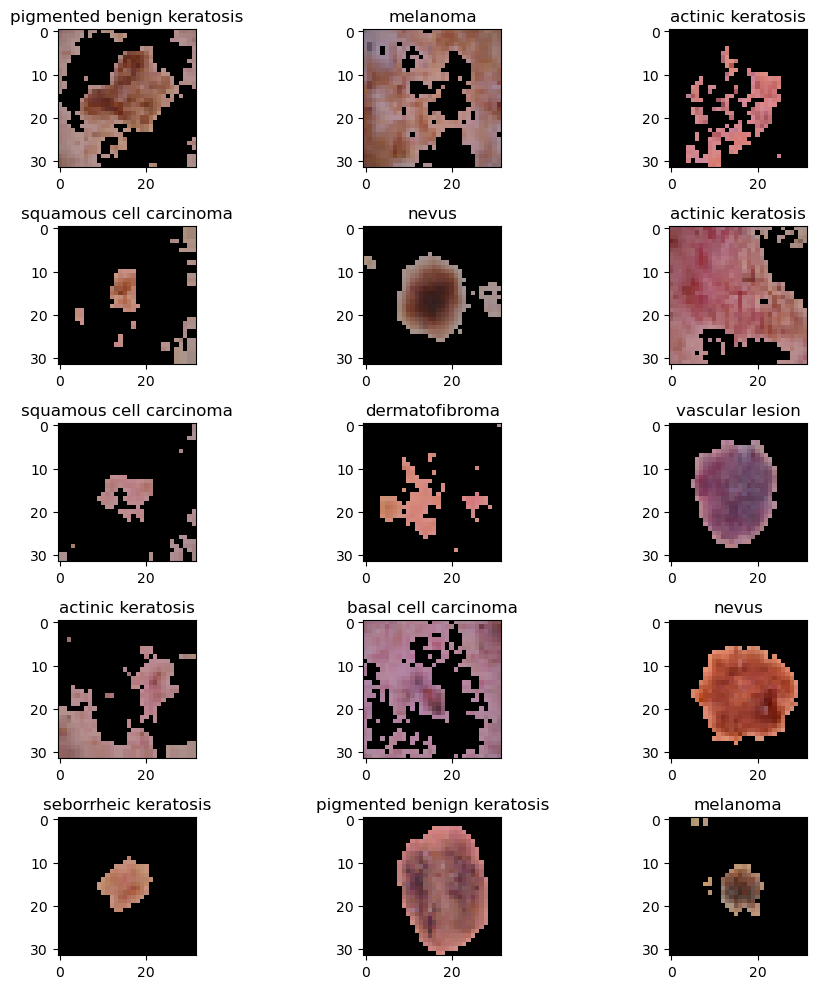

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.title(classes[np.argmax(Y_batch[0])])
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))  # Adjust based on your number of classes


In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 conv2d_15 (Conv2D)          (None, 2, 2, 128)        

In [20]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

# Compile the model with the chosen optimizer
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_generator, epochs=15, validation_data=test_generator,steps_per_epoch=50)

Epoch 1/15
50/50 [==============================] - 99s 2s/step - loss: 2.0439 - accuracy: 0.2269 - val_loss: 2.2888 - val_accuracy: 0.1441
Epoch 2/15
50/50 [==============================] - 91s 2s/step - loss: 1.9822 - accuracy: 0.2444 - val_loss: 2.2213 - val_accuracy: 0.1780
Epoch 3/15
50/50 [==============================] - 91s 2s/step - loss: 1.8362 - accuracy: 0.3221 - val_loss: 2.2210 - val_accuracy: 0.2203
Epoch 4/15
50/50 [==============================] - 92s 2s/step - loss: 1.7295 - accuracy: 0.3671 - val_loss: 2.2212 - val_accuracy: 0.2288
Epoch 5/15
50/50 [==============================] - 91s 2s/step - loss: 1.6182 - accuracy: 0.3984 - val_loss: 2.0781 - val_accuracy: 0.2542
Epoch 6/15
50/50 [==============================] - 80s 2s/step - loss: 1.5303 - accuracy: 0.4344 - val_loss: 2.2448 - val_accuracy: 0.2797
Epoch 7/15
50/50 [==============================] - 138370s 2824s/step - loss: 1.5542 - accuracy: 0.4422 - val_loss: 2.2085 - val_accuracy: 0.2966
Epoch 8/15
21

In [14]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

4/4 [==============================] - 21s 3s/step - loss: 2.0959 - accuracy: 0.3136
Test accuracy: 0.31355932354927063
